importing libraries 

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('amazon_sales_dataset.csv')
# print(dataset.head())


In [4]:
dataset.drop(['order_id' , 'product_id'], axis=1 , inplace=True)



In [5]:
dataset['order_date'] = pd.to_datetime(dataset['order_date'])
dataset['month'] = dataset['order_date'].dt.month
dataset['year'] = dataset['order_date'].dt.year 
dataset['day'] = dataset['order_date'].dt.day
dataset.drop('order_date' , axis=1 , inplace=True)


now separating X and Y

In [6]:
x = dataset.drop('total_revenue' , axis=1)
y = dataset['total_revenue'].values


In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder' , OneHotEncoder() , ['product_category','customer_region', 'payment_method'])] , remainder='passthrough')

x = np.array(ct.fit_transform(x))

In [8]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.2 , random_state=0)


In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(x_train , y_train)

y_pred = regressor.predict(x_test)



In [10]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), axis=1))


[[ 996.23  929.5 ]
 [ 818.1   796.12]
 [1041.31  997.7 ]
 ...
 [ 642.19  574.4 ]
 [1248.11 1333.7 ]
 [ 608.78  528.24]]


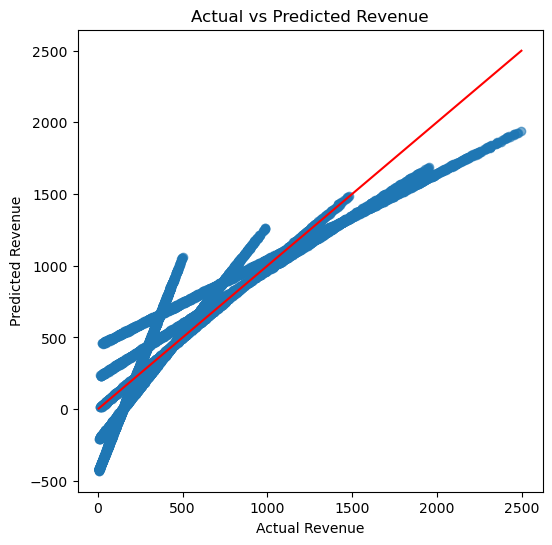

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))

# scatter: actual vs predicted
plt.scatter(y_test, y_pred, alpha=0.6)

# perfect prediction line
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color='red'
)

plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs Predicted Revenue')
plt.show()


In [12]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2:.2f}')

R² Score: 0.88
